In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns; sns.set()
import os
import patoolib
import squarify



In [ ]:
def extractor():
    """unpacking files with patoolib into a folder named insta_data"""
    os.chdir('E:\\')
    patoolib.extract_archive('instacart.tar.gz', outdir = "insta_data" )
    os.chdir('insta_data')
    os.chdir('instacart_2017_05_01')
    return os.listdir()


#  'aisles.csv','departments.csv','orders.csv','order_products__prior.csv',
# 'order_products__train.csv','products.csv'
#extractor()

In [2]:
#file paths to be converted to dataframe
file_dict = {
'aisles' : "E:\\insta_data\\instacart_2017_05_01\\aisles.csv",
'departments' : "E:\\insta_data\\instacart_2017_05_01\\departments.csv",
'orders' : "E:\\insta_data\\instacart_2017_05_01\\orders.csv",
'prior': "E:\\insta_data\\instacart_2017_05_01\\order_products__prior.csv",
'train' : "E:\\insta_data\\instacart_2017_05_01\\order_products__train.csv",
'products' : "E:\\insta_data\\instacart_2017_05_01\\products.csv"
}

In [3]:
def dataframe_create(dictionary):
    """creating dataframes for each file"""
    for name, file in dictionary.items():
        name = pd.read_csv(file, index_col = 0)
        name.info()
        yield name
    return name.info()
        
aisles, departments, orders, prior, train, products = dataframe_create(file_dict)

# AISLES = aisles from where products are found
# Int64Index: 134 entries, 1 to 134
# Data columns (total 1 columns):
# aisle    134 non-null object
# dtypes: object(1)
# memory usage: 2.1+ KB


# DEPARTMENTS = departments classification(parent)
# possible type error with FutureWarning 
# FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
# mask |= (ar1 == a)


# PRODUCTS = individual item with aisle and department ID
# Int64Index: 49688 entries, 1 to 49688
# Data columns (total 3 columns):
# product_name     49688 non-null object
# aisle_id         49688 non-null int64
# department_id    49688 non-null int64
# dtypes: int64(2), object(1)
# memory usage: 1.5+ M


# ORDERS = customer information, times and dataframe prior/train
# Int64Index: 3421083 entries, 2539329 to 272231
# Data columns (total 6 columns):
# user_id                   int64
# eval_set                  object
# order_number              int64
# order_dow                 int64
# order_hour_of_day         int64
# days_since_prior_order    float64
# dtypes: float64(1), int64(4), object(1)


# PRIOR = items reordered and what place they added them to their cart
# Data columns (total 3 columns):
# product_id           int64
# add_to_cart_order    int64
# reordered            int64
# dtypes: int64(3)
# memory usage: 989.8 MB

# TRAIN = Int64Index: 1384617 entries, 1 to 3421070
# Data columns (total 3 columns):
# product_id           1384617 non-null int64
# add_to_cart_order    1384617 non-null int64
# reordered            1384617 non-null int64
# dtypes: int64(3)
# memory usage: 42.3 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 134
Data columns (total 1 columns):
aisle    134 non-null object
dtypes: object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 1 columns):
department    21 non-null object
dtypes: object(1)
memory usage: 336.0+ bytes


C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421083 entries, 2539329 to 272231
Data columns (total 6 columns):
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 2 to 3421083
Data columns (total 3 columns):
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(3)
memory usage: 989.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 1 to 3421070
Data columns (total 3 columns):
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(3)
memory usage: 42.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 3 columns):

In [4]:
# In case of iterating for repetition 
df_arr = [aisles, departments, orders, prior, train, products]

In [5]:
# checking for missing values in array; total = 0, days_since_prior_order    206209
for df in df_arr:
    print(df.isnull().sum())

aisle    0
dtype: int64
department    0
dtype: int64
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [6]:
# merge of DEPARTMENTS, AISLES, and PRODUCTS
stock = pd.merge(products, aisles, on = 'aisle_id')
stock.pop('aisle_id')
stock = pd.merge(stock, departments, on = 'department_id',  sort = False)
stock.pop('department_id')
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 3 columns):
product_name    49688 non-null object
aisle           49688 non-null object
department      49688 non-null object
dtypes: object(3)
memory usage: 1.5+ MB


In [7]:
stock.loc[stock['aisle'] == 'missing']
# 1258 products contain "missing" in aisle and department column
# department_id = 21  aisle_id = 100

product_name    aisle department
42813                    Ultra Antibacterial Dish Liquid  missing    missing
42814                          Organic Honeycrisp Apples  missing    missing
42815                             Uncured Turkey Bologna  missing    missing
42816  Write Bros Ball Point Pens, Cap-Pen, Medium (1...  missing    missing
42817         Classics Baby Binks Easter Chocolate Bunny  missing    missing
42818                Strawberry Cheesecake Nonfat Yogurt  missing    missing
42819                      Crossovers Olive Thyme Almond  missing    missing
42820                            Fancy Diced Hot Chilies  missing    missing
42821                                     Pompelmo Water  missing    missing
42822                    Bake & Break Cheese Garlic Loaf  missing    missing
42823                           Traditional Tartar Sauce  missing    missing
42824    Plain Dairy-Free Probiotic Drinkable Cashewgurt  missing    missing
42825                                       Chub Chorizo  missing    missing
42826                       Vegetable Hearty Garden Soup  missing    missing
42827                    Nacho Grain-Free Tortilla Chips  missing    missing
42828                                        Ratatouille  missing    missing
42829                  Liquid Water Enhance Ice Van Java  missing    missing
42830                              Red Sweet Mini Pepper  missing    missing
42831                             Spicy Bbq Chicken Soup  missing    missing
42832                    Naturals Grilled Chicken Nugget  missing    missing
42833                         Buffalo Style Chicken Wrap  missing    missing
42834             Organic Edamame & Mung Bean Fettuccine  missing    missing
42835  Natural Orange Flavor Liquid Sublingual Melatonin  missing    missing
42836   White Apple Cauliflower & Leek Organic Baby Food  missing    missing
42837                           Organic Vanilla Soy Milk  missing    missing
42838                         Yellow Easter Basket Cakes  missing    missing
42839         Organic Honey Balsamic Dressing & Marinade  missing    missing
42840                           Broccoli Rabe Rapini Bag  missing    missing
42841                                   Onion Crispbread  missing    missing
42842                     Paso Robles Cabernet Sauvignon  missing    missing
...                                                  ...      ...        ...
44041                        Peppermint Liquid Dish Soap  missing    missing
44042                   Milano Slices Peppermint Cookies  missing    missing
44043  Organic Date & Lemon Artisan Crisps Made With ...  missing    missing
44044  Steamfresh Chef's Favorites Broccoli, Cauliflo...  missing    missing
44045                 Soft & Moist Lemon Zest Madeleines  missing    missing
44046                            Bursts Grape Soft Drink  missing    missing
44047            Orange & Ginger Flavored Finest Yoghurt  missing    missing
44048                           Rainier Chilean Cherries  missing    missing
44049                                General Tsao's Tofu  missing    missing
44050                           Lndbrg Wht Jasm Rice 8 Z  missing    missing
44051  Vanilla Drink Crafted With Authentic Greek Yogurt  missing    missing
44052                              Popcorn Butter Flavor  missing    missing
44053                                        Shrimp Ring  missing    missing
44054                            Hot Cocoa Marsh Creamer  missing    missing
44055                             Organic Ground Chicken  missing    missing
44056                      Well Yes! Chicken Noodle Soup  missing    missing
44057       Peanut Butter Cups Stuffed with Pieces Candy  missing    missing
44058                 Greek Yogurt Salted Caramel Crunch  missing    missing
44059             Caribou Blend Medium Roast Coff K Cups  missing    missing
44060      Complete Care Dishwasher Detergent ActionPacs  missing    missing
44061  Giant Roll Bath Tissue Essentials

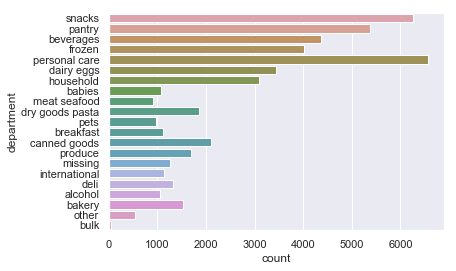

In [8]:
# How can we classify the items? personal care offers the most
# Will this be evident in the recommended products?
sns.countplot(
            y = 'department',
            data = stock,  
            orient = 'h', 
            saturation = 0.5,
    
            )

In [9]:
# obtain amount available sum
total_units= stock.groupby(['department','aisle']).size().sort_values()

In [10]:
total_units = pd.DataFrame(total_units)
total_units.tail()
# change from type series to dataframe

0
department    aisle                     
dairy eggs    yogurt                1026
personal care vitamins supplements  1038
frozen        ice cream ice         1091
snacks        candy chocolate       1246
missing       missing               1258

In [11]:
# How many products come from each classification? Will this have to be weighted?
total_units.columns.name = None
total_units.reset_index(inplace = True)

In [12]:
total_units.rename(columns = { 0:'totals'}, inplace = True)
# renaming unnamed column

In [13]:
# continue to classify items by aisles and department
# also to compare with recommendations solution

# Draw scatter plot
fig, ax = plt.subplots(figsize=(20,65), dpi= 325)
# Initial setup for the background
ax.hlines(
          y=total_units.aisle, 
          color='gray', 
          xmin=350, 
          xmax=1050, 
          alpha=0.3,
          linewidth=2,
          linestyles='dashdot'
          )

plot_kws = {'s':500}
# controls marker size passed down to plt.scatter at draw time
sns.scatterplot(
            x= 'totals',
            y='aisle',
            hue='department', 
            data=total_units, 
            palette= 'colorblind', 
            **plot_kws
           )

# Title, Label, Ticks and Legend
ax.set_title('Product Aisle Items', fontdict={'size':63})
plt.legend(loc = 'lower right', prop={'size': 50}, markerscale = 5)
# x axis
ax.set_xlim(0, 1300)
ax.set_xlabel('Items Available', fontdict={'size':50})
ax.set_xticklabels([0,200,400,600,800,1000,1200], fontdict = {'size': 36})
ax.tick_params(axis = 'x', labelsize = 50, which = 'major')
# y axis
ax.tick_params(axis = 'y', labelsize = 25, which ='major')
plt.ylabel('Aisle', fontdict = {'size':21})
ax.set_yticks(total_units.aisle)
ax.set_yticklabels(total_units.aisle.str.title(),
                   fontdict={'horizontalalignment': 'right'})


plt.show()

In [14]:
# How many purchases are made per customer? MEAN = 16
order_amt = orders.user_id.value_counts()

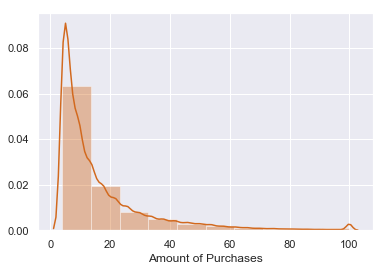

In [15]:
# Distribution plot for amount of purchases.
sns.distplot(
            order_amt, 
            kde = True, 
            bins = 10, 
            color = 'chocolate', 
            axlabel = 'Amount of Purchases',
            )

In [16]:
prior.reset_index(inplace = True)

In [24]:
# How many items are purchased for each order? MEAN = 10
items_purchased = prior.order_id.value_counts()

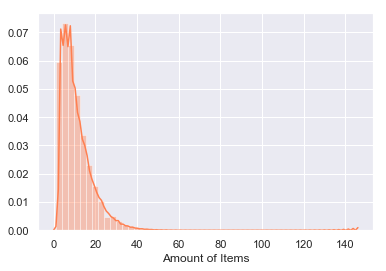

In [42]:
sns.distplot(
            items_purchased, 
            kde = True, 
            color = 'coral', 
            axlabel = 'Amount of Items',
            )

In [44]:
# replace the product_id column with names of the items 
prior = pd.merge(prior, 
                 products['product_name'],
                 on = 'product_id',
                 how = 'left')
prior.pop('product_id')

0           33120
1           28985
2            9327
3           45918
4           30035
5           17794
6           40141
7            1819
8           43668
9           33754
10          24838
11          17704
12          21903
13          17668
14          46667
15          17461
16          32665
17          46842
18          26434
19          39758
20          27761
21          10054
22          21351
23          22598
24          34862
25          40285
26          17616
27          25146
28          32645
29          41276
            ...  
32434459    41950
32434460    31717
32434461    12935
32434462    25122
32434463    10667
32434464    38061
32434465    38185
32434466    12218
32434467    32299
32434468     3060
32434469    20539
32434470    35221
32434471    12861
32434472    17279
32434473    12738
32434474    16797
32434475    43352
32434476    32700
32434477    12023
32434478    47941
32434479     7854
32434480    45309
32434481    21162
32434482    18176
32434483  

In [45]:
# Top 10 items sold most 
text = prior.product_name.value_counts().head(10)


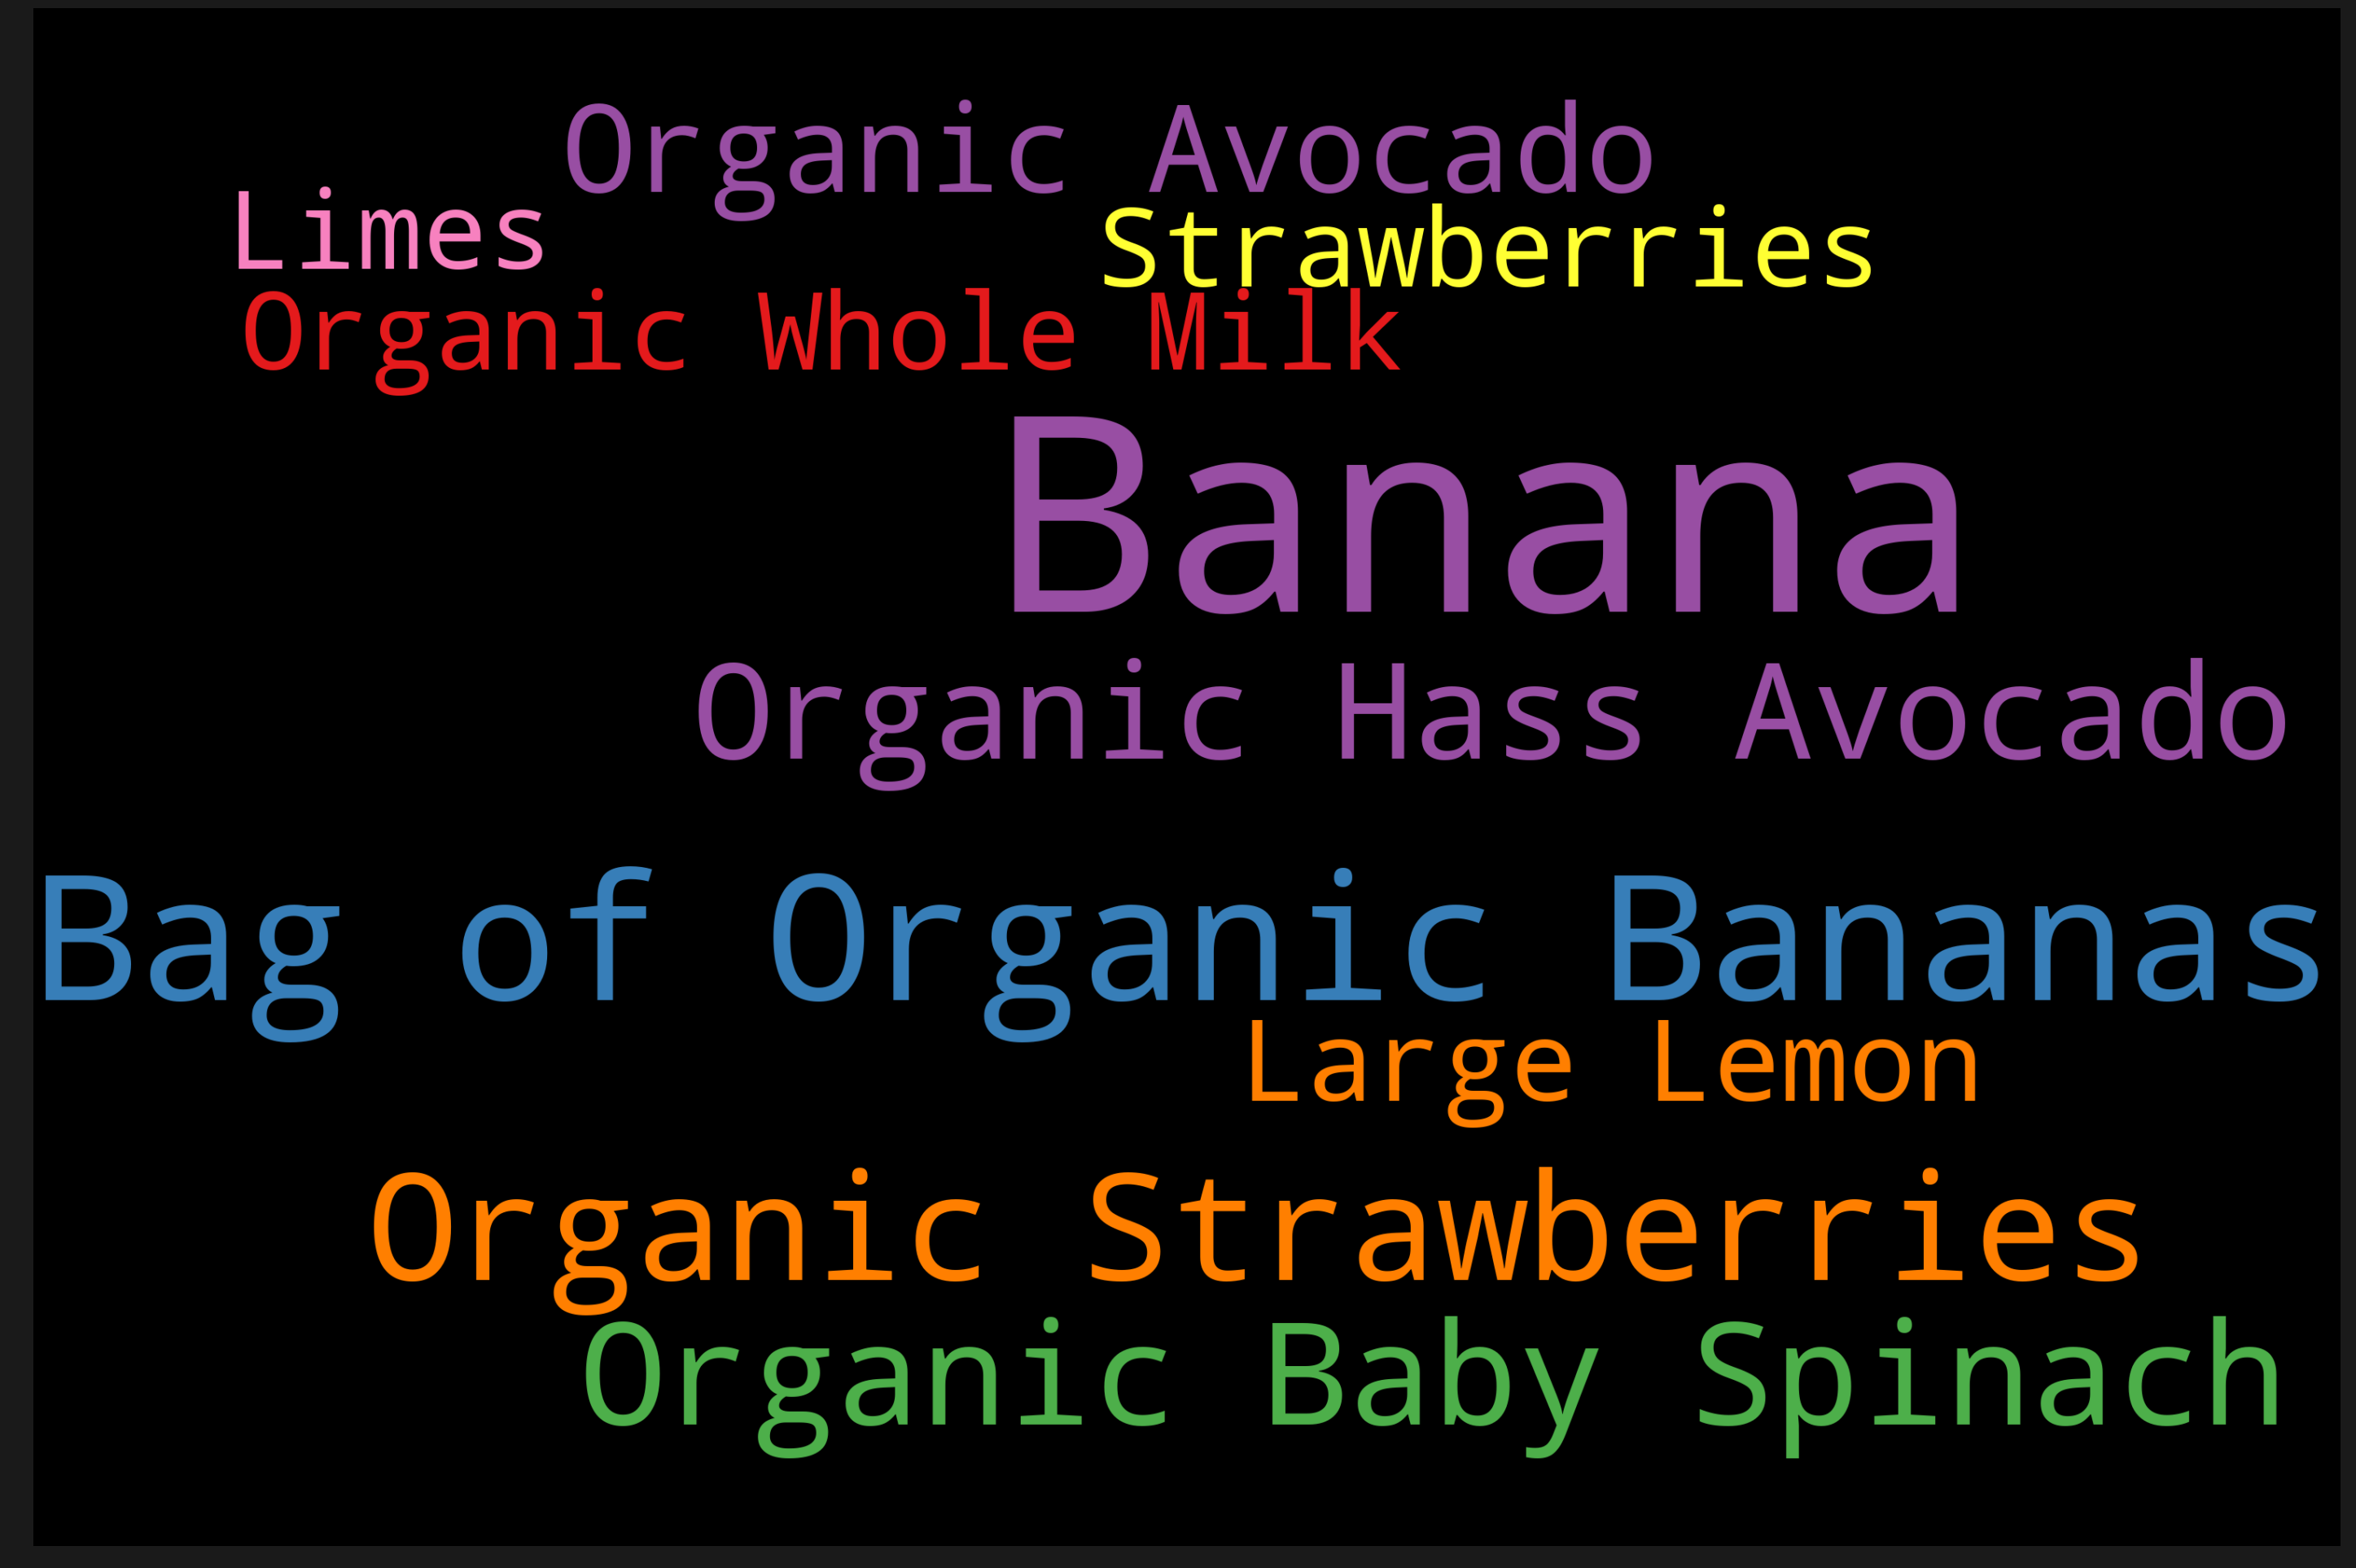

In [46]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                      
                      width = 3000,
                      height = 2000, 
                      background_color = 'black', 
                      relative_scaling = 0.5,
                      colormap='Set1'
                     ).generate_from_frequencies(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [65]:
# What items are reordered the most? only a few slight differences
reordered_amt = prior.loc[prior['reordered'] == 1].groupby('product_name').size()
reordered_amt.sort_values(inplace = True, ascending = False)

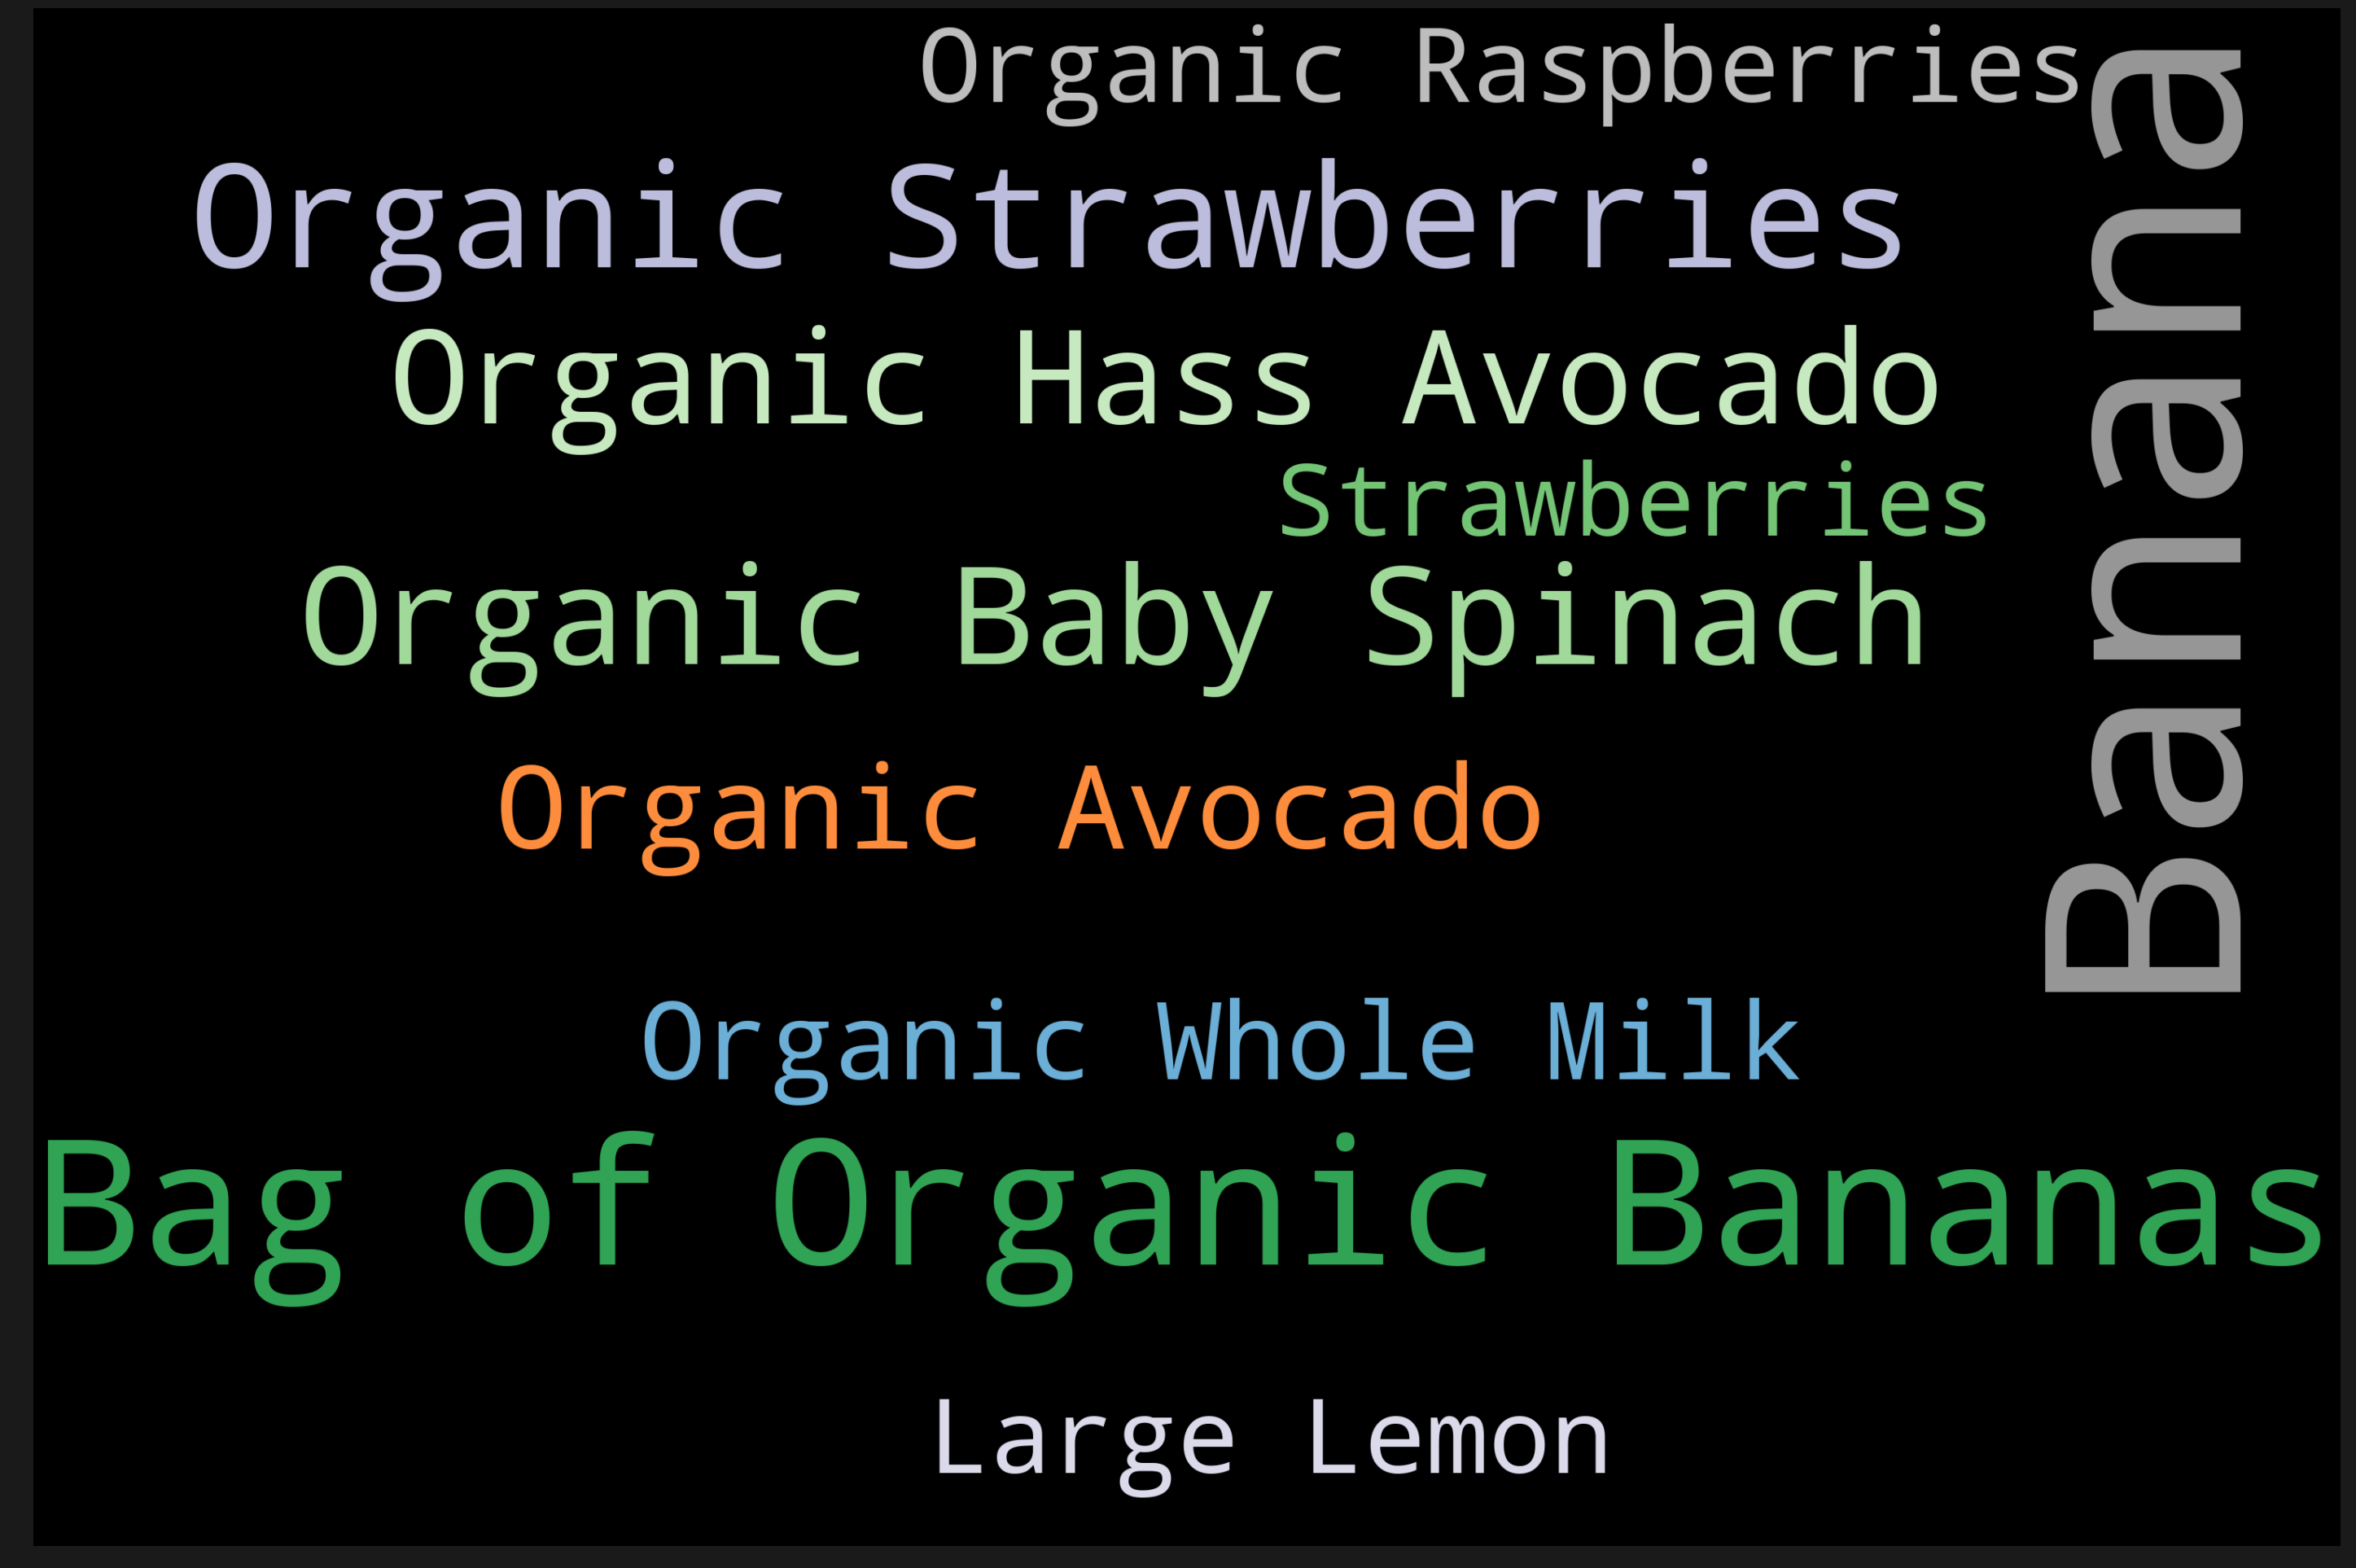

In [67]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                      
                      width = 3000,
                      height = 2000, 
                      background_color = 'black', 
                      relative_scaling = 0.5,
                      colormap='tab20c'
                     ).generate_from_frequencies(reordered_amt.head(10))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [72]:
#What items is usually chosen first?
first_chosen = prior.loc[prior['add_to_cart_order'] == 1].groupby('product_name').size()
first_chosen.sort_values(inplace = True, ascending = False)

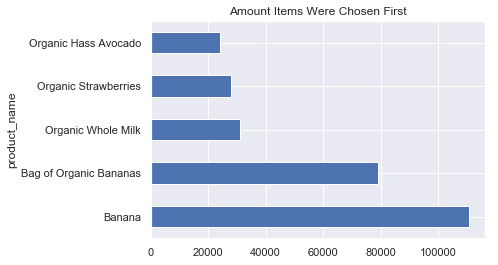

In [78]:
first_pick = first_chosen.head()
first_pick.plot(kind = 'barh', title = "Amount Items Were Chosen First")

In [79]:
# How often is a product reordered
reorder_ratio = prior.reordered.value_counts()

Text(0, 0.5, '')

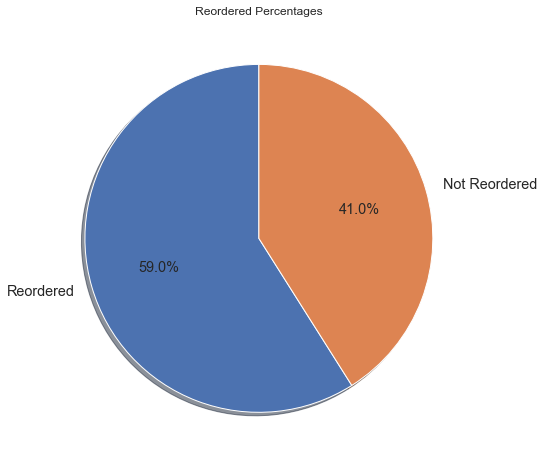

In [80]:
# Plotting pie chart, kwargs draws from pyplot.pie
pie_kwargs = {'startangle': 90, 
              'labels' : ['Reordered','Not Reordered'],
              'autopct' : '%.1f%%',
               'fontsize' : 'x-large'
             }
reorder_ratio.plot(kind = 'pie', 
                   figsize = (8,8),
                   title = 'Reordered Percentages',
                   shadow = True,
                   **pie_kwargs).set_ylabel('')


In [81]:
time_count = orders.groupby(['order_dow', 'order_hour_of_day']).size()

In [82]:
# Creating a dataframe to work with day/time values

dow_arr = sorted(orders.order_dow.unique())
dow_name = ['Sunday',
            'Monday',
            'Tuesday',
            'Wednesday',
            'Thursday', 
            'Friday', 
            'Saturday']
day_df = pd.DataFrame({'day' : dict(zip(dow_arr, dow_name))}, index= dow_arr)
#merge newly created dataframe with the counts of time/day series
hour_day = day_df.merge(time_count.rename('count'),
                        how = 'left',
                        left_index = True, 
                        right_on = 'order_dow')
hour_day.reset_index(inplace = True)









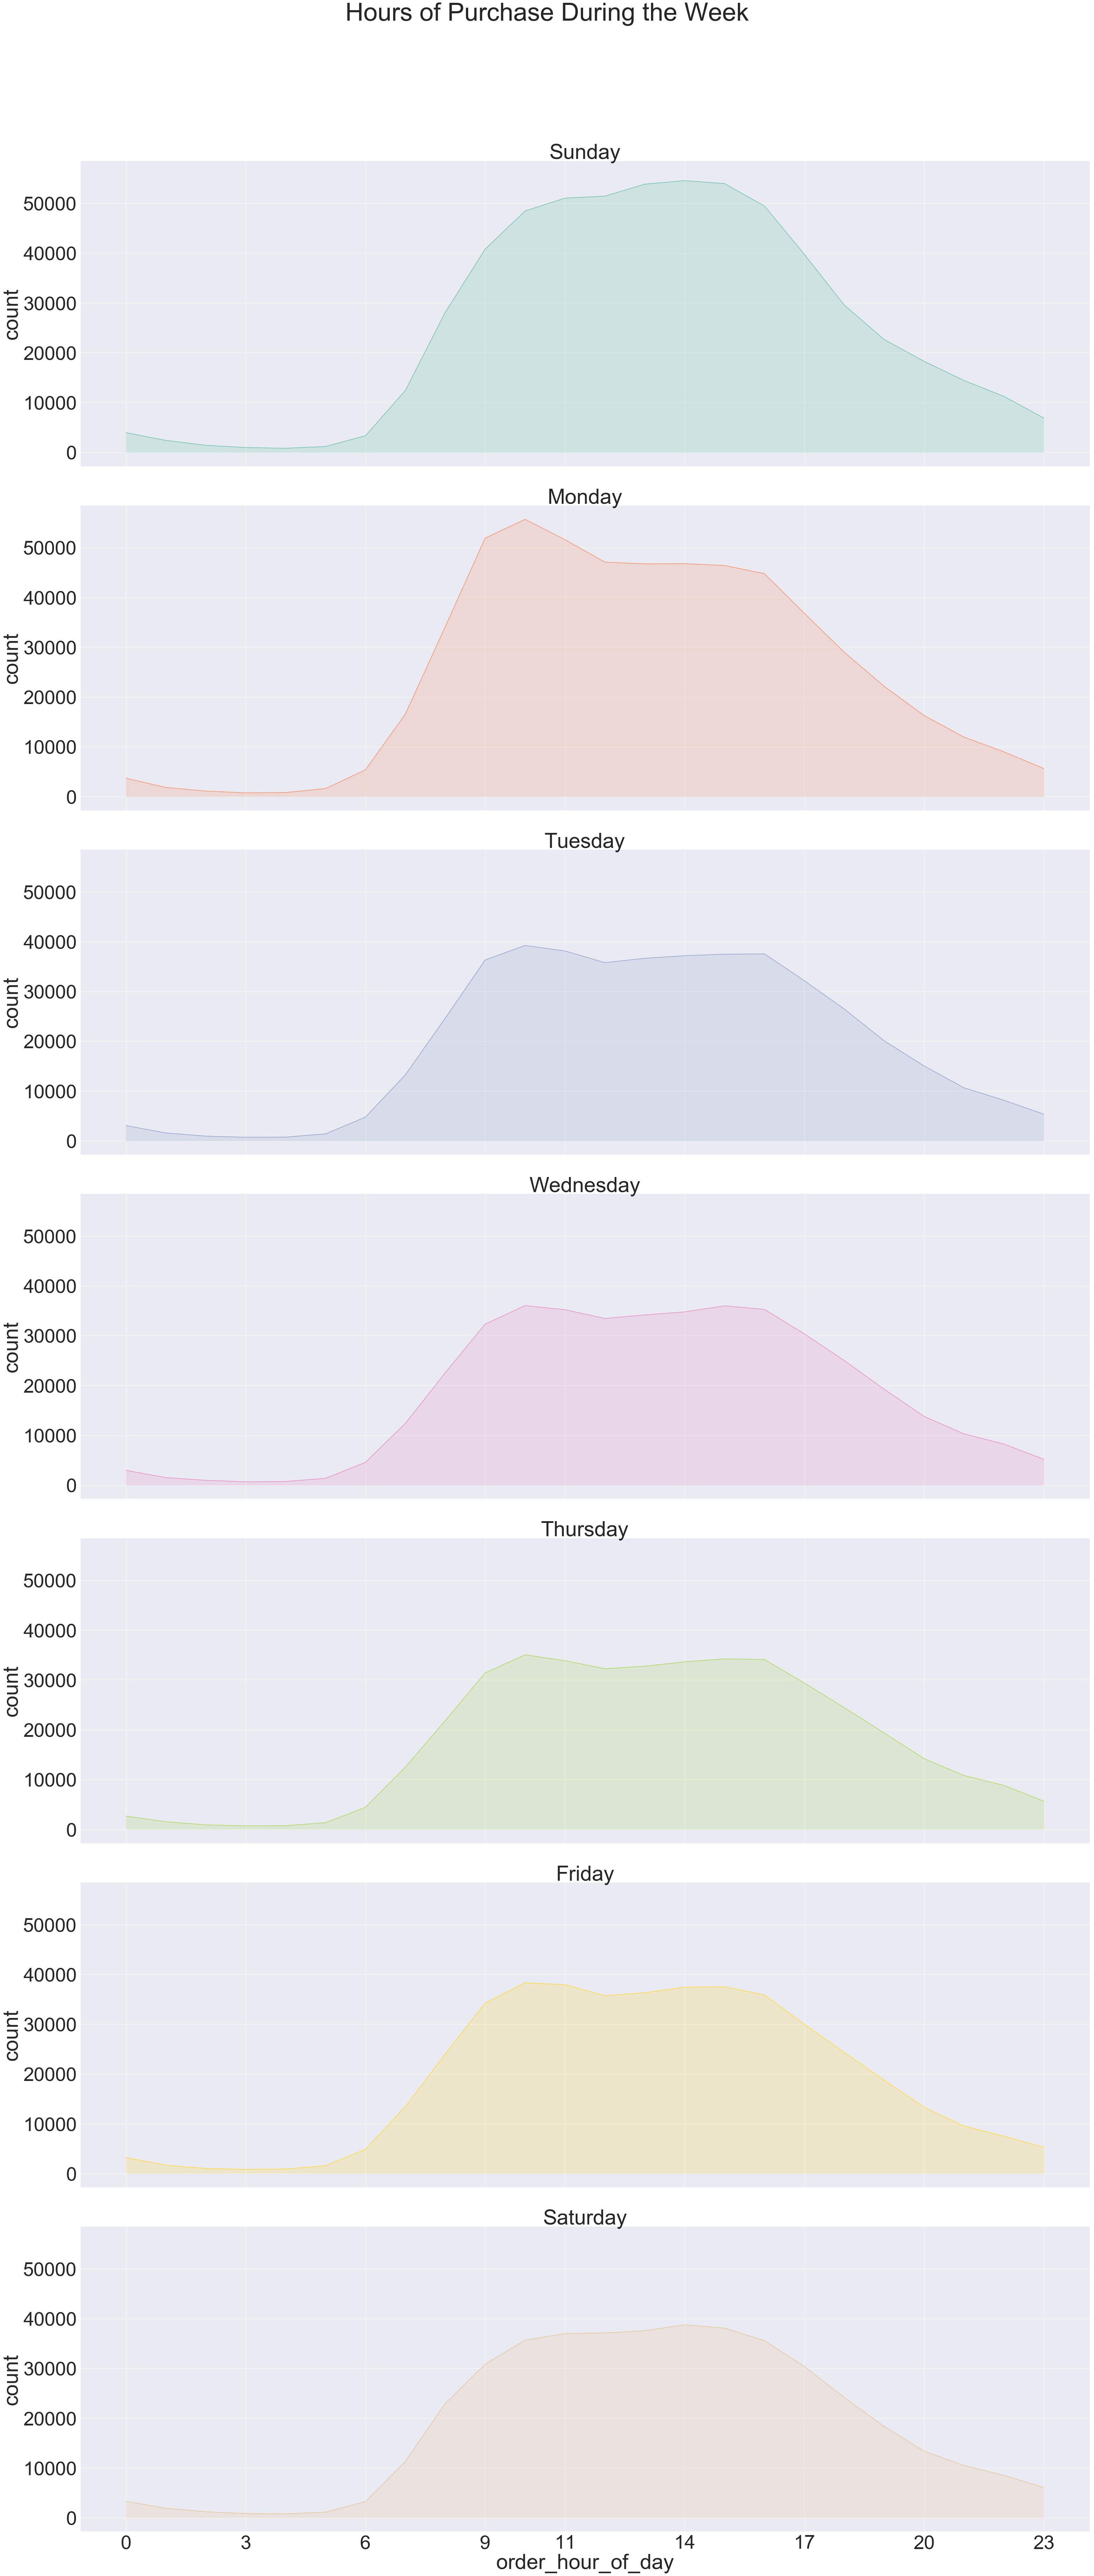

In [87]:
# What days of the week are most popular for ordering? Hours of the day?
# Sunday and Monday from 10AM to 5PM
sns.set(font_scale = 5)
grid_col = sns.FacetGrid(hour_day, 
                  col='day',
                  hue='day',
                  col_wrap= 1,
                  height = 15,
                  aspect = 3,
                  margin_titles = True,
                  palette = 'Set2'
                  )
 # Add the line over the area with the plot function
grid_col = grid_col.map(plt.plot,
          'order_hour_of_day',
          'count')

# Fill the area with fill_between
grid_col = grid_col.map(plt.fill_between,
          'order_hour_of_day',
          'count', alpha=0.2).set_titles("{col_name} day")
 
# Control the title of each facet
grid_col = grid_col.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
grid_col = grid_col.fig.suptitle('Hours of Purchase During the Week')
 
# Formatting the plot  
plt.xticks(ticks = [0, 3, 6, 9, 11, 14, 17, 20, 23])    

    
    
    
plt.show()


In [88]:
# How many days before re-ordering?
reorders = orders.groupby('days_since_prior_order').size()

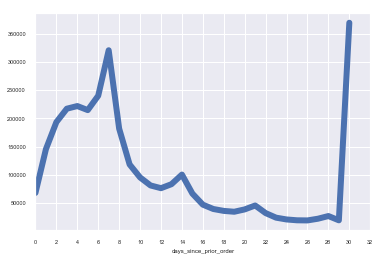

In [90]:

reorders.plot(y = 'Amount of ordres',
              markersize = 15,
              xticks = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],
              use_index = True,
              linewidth = 6)
sns.set(font_scale = .5)